In [1]:
import pandas as pd

import numpy as np

import scipy.stats as stats

import seaborn as sns

import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler, label_binarize

from sklearn.decomposition import PCA

from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train_cleaned.csv")

df.head(5)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Credit_History_labels,Age_Group
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,...,1,0,1,0,0,0,1,0,Long,14-25
1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1.0,...,1,0,1,0,0,0,1,0,Long,14-25
2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,...,1,0,1,0,0,0,1,0,Long,14-25
3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,...,1,0,1,0,0,0,1,0,Long,14-25
4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,...,1,0,1,0,0,0,1,0,Long,14-25


### Relationship Between Credit Score And Different Features

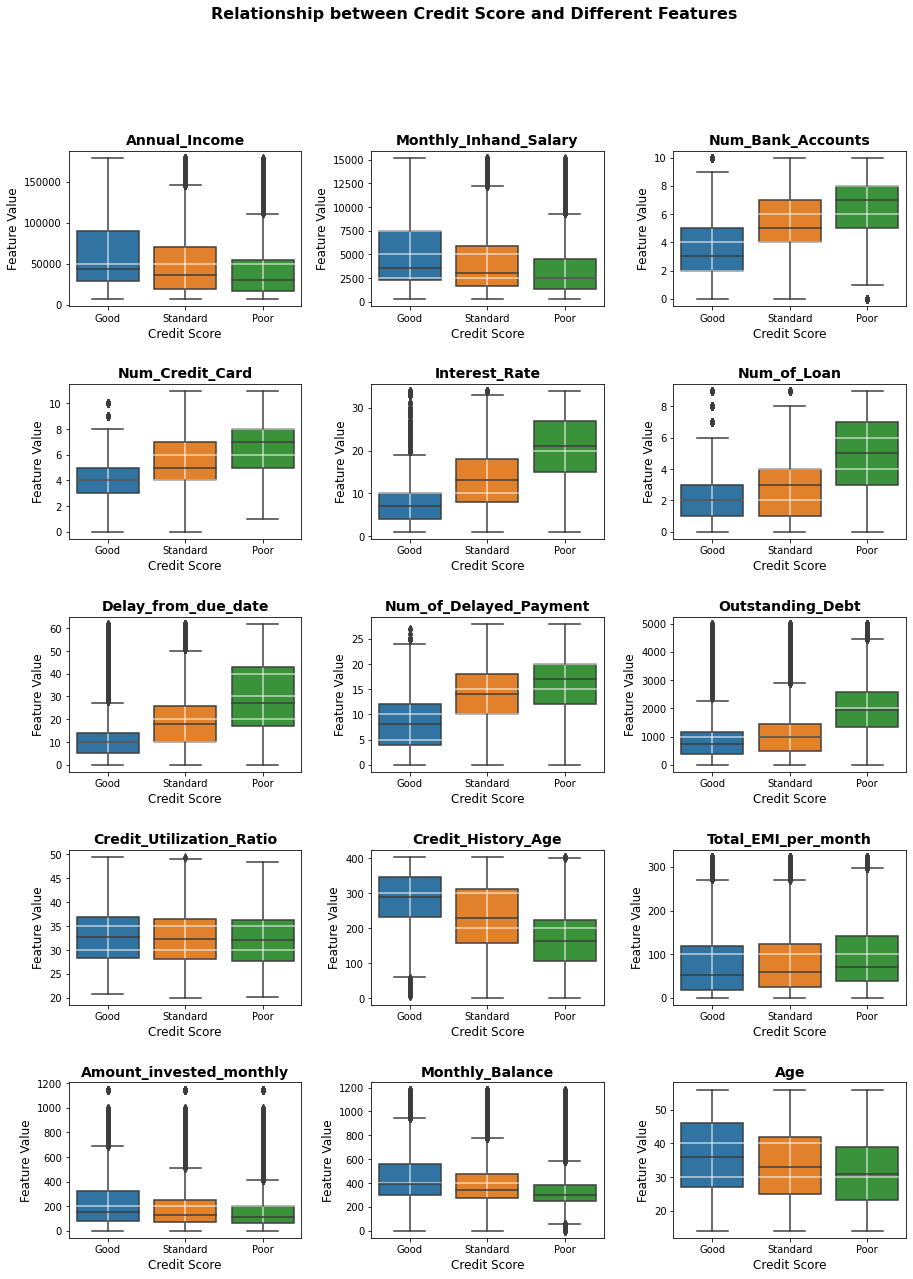

In [3]:
# Create a figure and 2x3 grid of subplots
fig, ax = plt.subplots(5, 3, figsize=(15, 20))

# Flatten the 2D array of subplots into a 1D array
ax = ax.flatten()

# List of features to plot
features = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 
            'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 
            'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 
            'Amount_invested_monthly', 'Monthly_Balance', 'Age']

# Plot box plots for each feature
for i, feature in enumerate(features):
    sns.boxplot(x='Credit_Score', y=feature, data=df, ax=ax[i])
    ax[i].set_title(feature, fontsize=14, fontweight='bold')
    ax[i].set_xlabel('Credit Score', fontsize=12)
    ax[i].set_ylabel('Feature Value', fontsize=12)
    ax[i].grid(color='white', linestyle='-', linewidth=2, alpha=0.5)

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Add a title
fig.suptitle('Relationship between Credit Score and Different Features', fontsize=16, fontweight='bold')

# Show the plot
plt.show()

We can derive several insights regarding the relationship between different features and credit scores:

+ Annual Income: Higher annual income tends to correlate positively with better credit scores. Individuals with higher incomes are likely to have better financial stability and repayment capabilities, leading to higher creditworthiness.

+ Monthly In-hand Salary: Similar to annual income, a higher monthly in-hand salary is associated with better credit scores. This suggests that individuals with higher disposable incomes are more likely to manage their finances effectively and meet their credit obligations.

+ Number of Bank Accounts: The ideal range for the number of bank accounts is between 2 and 4. Having too few or too many bank accounts may indicate financial instability or complexity, potentially impacting credit scores negatively.

+ Number of Credit Cards: Similarly, maintaining a moderate number of credit cards (3-5) appears to be optimal for credit scores. Excessive credit card usage may lead to higher debt levels and lower creditworthiness.

+ Interest Rate: Individuals with average interest rates ranging from 4% to 11% tend to have better credit scores. High-interest rates (above 15%) may signal greater financial risk and result in lower credit scores.

+ Number of Loans: Managing 1-3 loans at a time is associated with better credit scores. Having too many loans concurrently may indicate financial strain and increase the risk of default, negatively impacting creditworthiness.

+ Delay from Due Date: A delay of 5-14 days from the due date appears to have minimal impact on credit scores. However, delaying payments for more than 17 days may result in lower credit scores, indicating potential financial mismanagement.

+ Number of Delayed Payments: Maintaining 4-12 delayed payments from the due date seems to be within an acceptable range for credit scores. Exceeding this threshold may suggest a pattern of delinquency and negatively affect creditworthiness.

+ Outstanding Debt: Individuals with outstanding debts below 1150 tend to have better credit scores. However, exceeding a debt level of 1338 may lead to lower credit scores, indicating higher financial risk.

+ Credit Utilization Ratio: There appears to be no significant correlation between credit utilization ratio and credit scores. This suggests that credit scores are influenced more by factors such as repayment history and credit history length.

+ Credit History Age: Longer credit history ages are associated with better credit scores. This indicates that individuals with established credit histories are viewed more favorably by lenders.

+ Total EMI per Month: The total number of EMIs paid per month does not appear to have a significant impact on credit scores. Other factors such as repayment history and debt levels may be more influential.

+ Amount Invested Monthly: Monthly investment amounts do not seem to significantly affect credit scores. Credit scores are likely influenced more by factors related to borrowing and repayment behavior.

+ Monthly Balance: Maintaining a high monthly balance in accounts at the end of the month may be indicative of financial stability and responsible financial management, positively impacting credit scores.

+ Age: Credit scores tend to improve with age, suggesting that older individuals may have more established credit histories and financial stability, resulting in higher creditworthiness.

These insights provide valuable guidance for individuals seeking to maintain or improve their credit scores by managing various financial factors effectively.

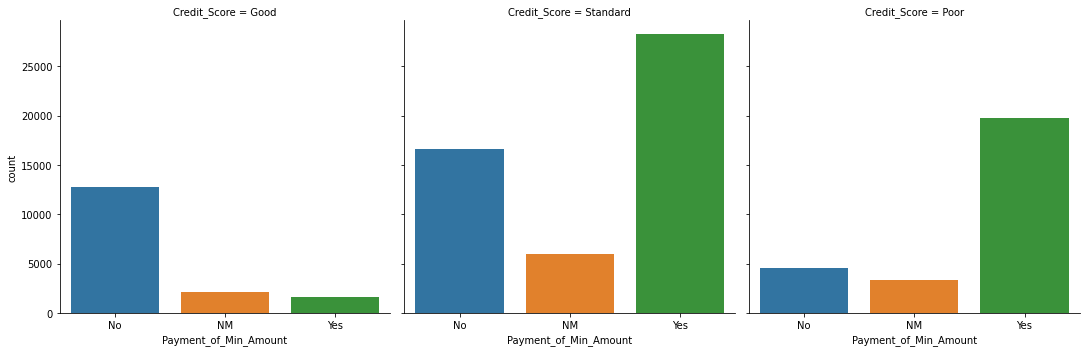

In [4]:
### Distribution of Payment_of_Min_Amount for each Credit Score

sns.factorplot('Payment_of_Min_Amount', col = 'Credit_Score', data = df, kind = 'count', col_wrap = 3)

From the provided graphs, it's evident that a significant portion of customers with good credit scores did not opt to pay the minimum amount for their loans. Conversely, customers with poor credit scores are more inclined to pay only the minimum amount for their loans.

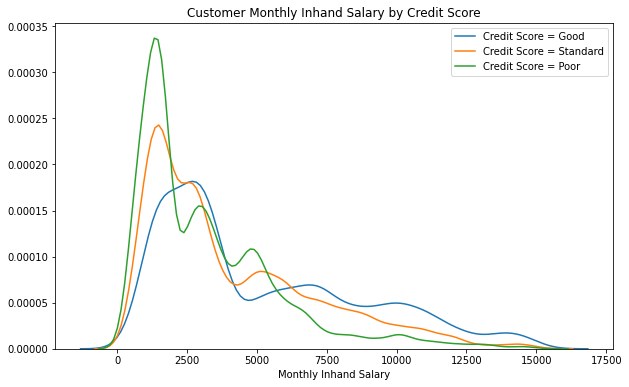

In [5]:
plt.figure(figsize=(10, 6))

for score in df['Credit_Score'].unique().tolist():
    
    sns.kdeplot(df['Monthly_Inhand_Salary'][df['Credit_Score'] == score], label=f'Credit Score = {score}')

plt.xlabel('Monthly Inhand Salary')

plt.legend()

plt.title('Customer Monthly Inhand Salary by Credit Score')

plt.show()

The graph illustrates that the majority of customers with a poor credit score tend to have lower monthly in-hand salaries compared to those with standard and good credit scores.

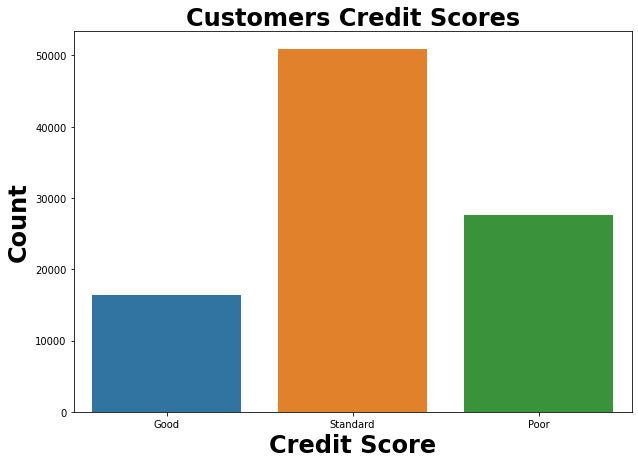

In [6]:
plt.figure(figsize=(10, 7))

sns.countplot(data=df, x="Credit_Score")

plt.title("Customers Credit Scores", size=24, fontweight="bold")

plt.xlabel("Credit Score", size=24, fontweight="bold")

plt.ylabel("Count", size=24, fontweight="bold")

plt.show()

Most people fill in the standard category

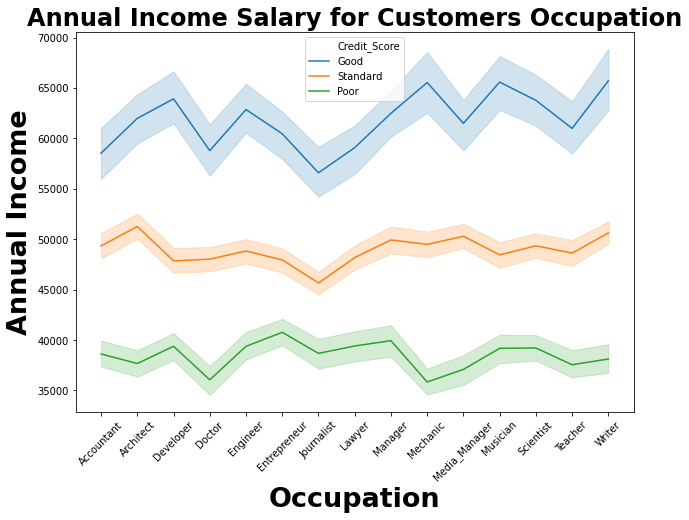

In [7]:
plt.figure(figsize=(10, 7))

sns.lineplot(data=df, x="Occupation", y="Annual_Income", hue="Credit_Score")

plt.xticks(rotation=45)

plt.title("Annual Income Salary for Customers Occupation", size=24, fontweight="bold")

plt.xlabel("Occupation", size=27, fontweight="bold")

plt.ylabel("Annual Income", size=27, fontweight="bold")

plt.show()

The annual income of customers does not significantly impact their credit score. This is evident from the observation that there is considerable variance in annual income, yet individuals can still maintain a good credit score regardless of whether their earning annually.

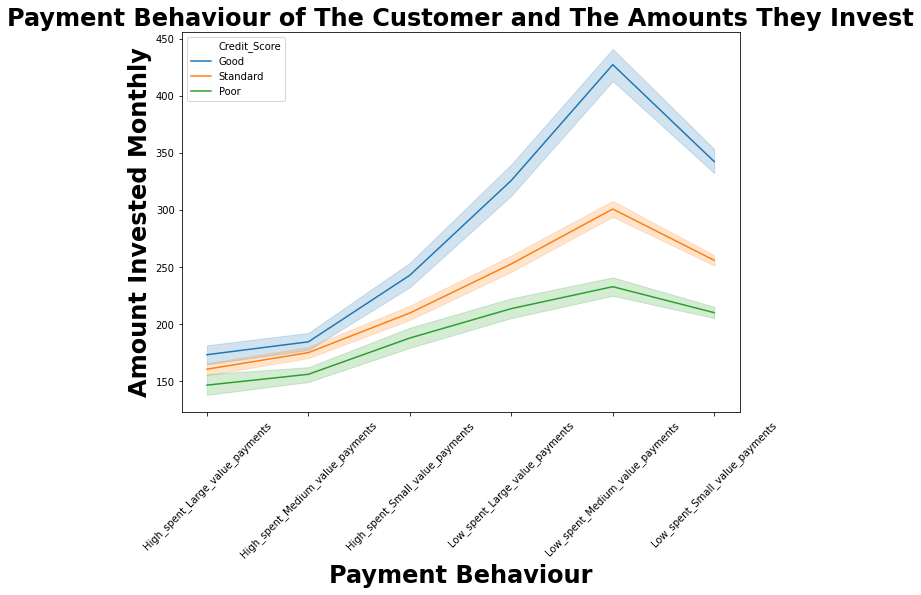

In [8]:
plt.figure(figsize=(10, 7))

sns.lineplot(data=df, x="Payment_Behaviour", y="Amount_invested_monthly", hue="Credit_Score")

plt.xticks(rotation=45)

plt.title("Payment Behaviour of The Customer and The Amounts They Invest",size=24,fontweight="bold",
)
plt.xlabel("Payment Behaviour", size=24, fontweight="bold")

plt.ylabel("Amount Invested Monthly", size=24, fontweight="bold")

plt.show()

A predominant trend is observed where individuals who invest between 200 to 350 per month tend to have a good credit score. Conversely, individuals with a standard credit score typically invest between 170 to 200 per month.

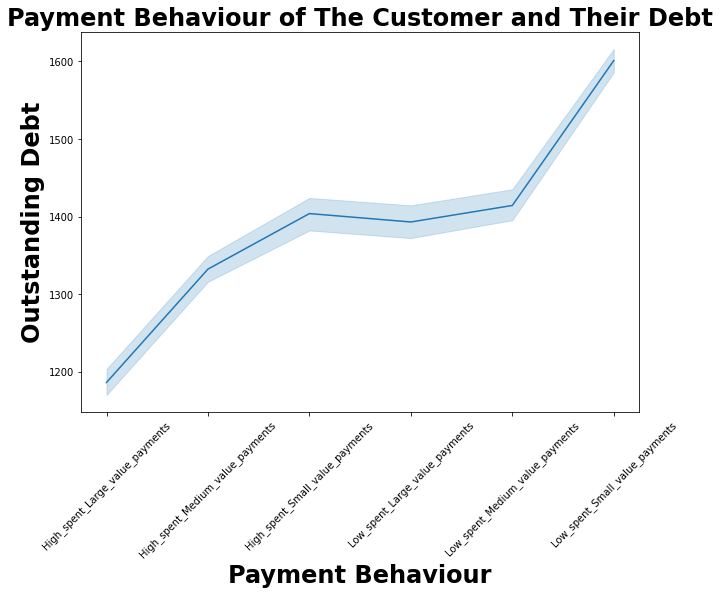

In [9]:
plt.figure(figsize=(10, 7))

sns.lineplot(data=df, x="Payment_Behaviour", y="Outstanding_Debt")

plt.xticks(rotation=45)

plt.title("Payment Behaviour of The Customer and Their Debt", size=24, fontweight="bold")

plt.xlabel("Payment Behaviour", size=24, fontweight="bold")

plt.ylabel("Outstanding Debt", size=24, fontweight="bold")

plt.show()

The majority of outstanding debt is observed among individuals categorized as "Low_spent_Small_value_payments," indicating that they do not heavily utilize credit cards but make small payments. Following closely are individuals categorized as "Low_spent_Medium_value_payments." Conversely, those classified as "High_spent_large_value_payments" have the least outstanding debt.

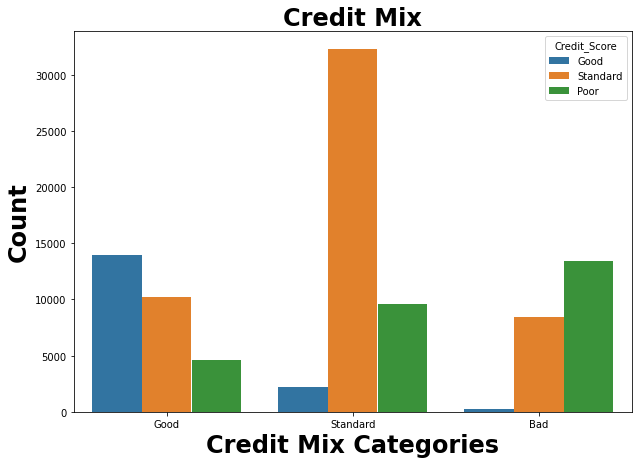

In [10]:
plt.figure(figsize=(10, 7))

sns.countplot(data=df, x="Credit_Mix", hue="Credit_Score")

plt.title("Credit Mix", size=24, fontweight="bold")

plt.xlabel("Credit Mix Categories", size=24, fontweight="bold")

plt.ylabel("Count", size=24, fontweight="bold")

plt.show()

Individuals without a credit mix predominantly have a standard credit score, with the second-largest category having a bad credit score. Conversely, individuals with a good credit mix mostly have a good credit score, followed by a significant portion with a standard credit score. Those with a standard credit mix tend to have a standard credit score, with the second-largest category having a bad credit score. Lastly, individuals with a bad credit mix primarily have a bad credit score, with the second-largest category having a standard credit score.

In [11]:
age_groups = (df.groupby(["Age_Group", "Credit_Score"])
                      ["Outstanding_Debt", "Annual_Income", "Num_Bank_Accounts", "Num_Credit_Card"].sum().reset_index())

age_groups

,Age_Group,Credit_Score,Outstanding_Debt,Annual_Income,Num_Bank_Accounts,Num_Credit_Card
0,14-25,Good,2606451.96,1.906328e+08,11297.0,12671.0
1,14-25,Poor,17885322.05,2.948944e+08,55498.0,55553.0
2,14-25,Standard,18313822.57,5.749653e+08,71372.0,70152.0
3,25-30,Good,1729412.69,1.298796e+08,7455.0,8583.0
4,25-30,Poor,9554277.85,1.684358e+08,30172.0,29516.0
5,25-30,Standard,9505418.93,3.590605e+08,41310.0,40215.0
6,30-45,Good,5377332.96,3.983894e+08,21704.0,27283.0
7,30-45,Poor,26318111.19,4.738334e+08,82683.0,83436.0
8,30-45,Standard,28744498.35,1.047784e+09,118663.0,118660.0
9,45-55,Good,2960250.13,2.600950e+08,13710.0,16877.0


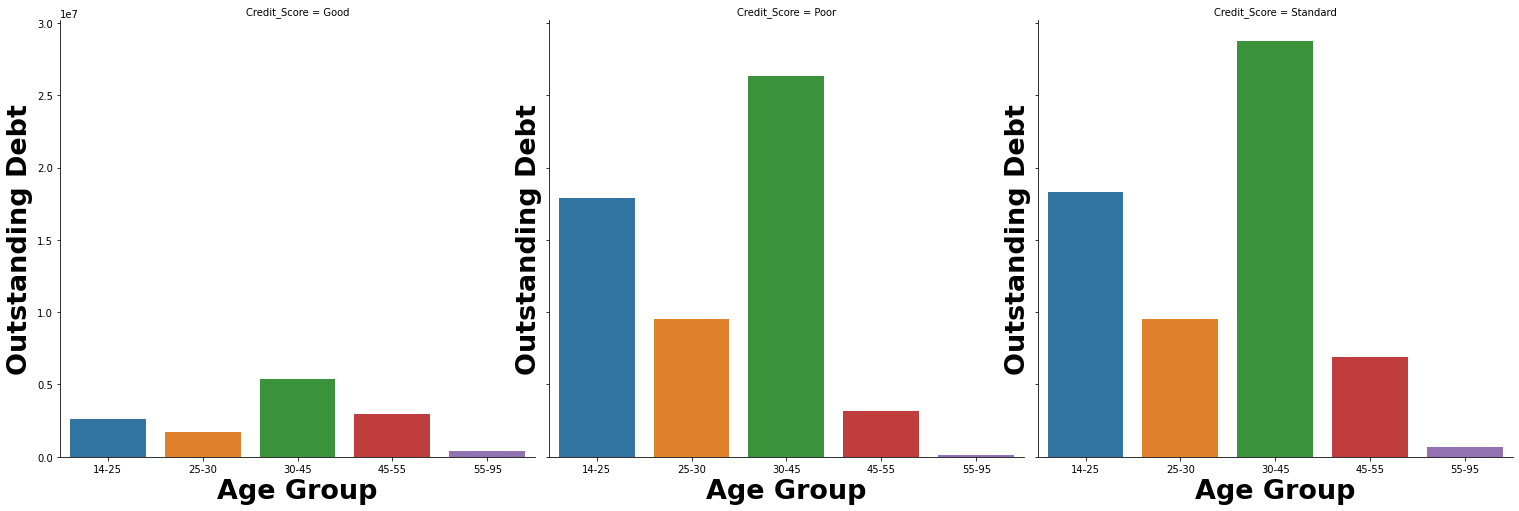

In [12]:
g = sns.catplot(
    data=age_groups,
    x="Age_Group",
    y="Outstanding_Debt",
    height=7,
    aspect=1,
    col="Credit_Score",
    kind="bar",
    ci=None,
)

# Set axis labels for each subplot
g.set_axis_labels("Age Group", "Outstanding Debt")

# Adjust the font size and weight of the axis labels
for ax in g.axes.flat:
    
    ax.set_xlabel("Age Group", fontsize=27, fontweight="bold")
    
    ax.set_ylabel("Outstanding Debt", fontsize=27, fontweight="bold")

plt.show()

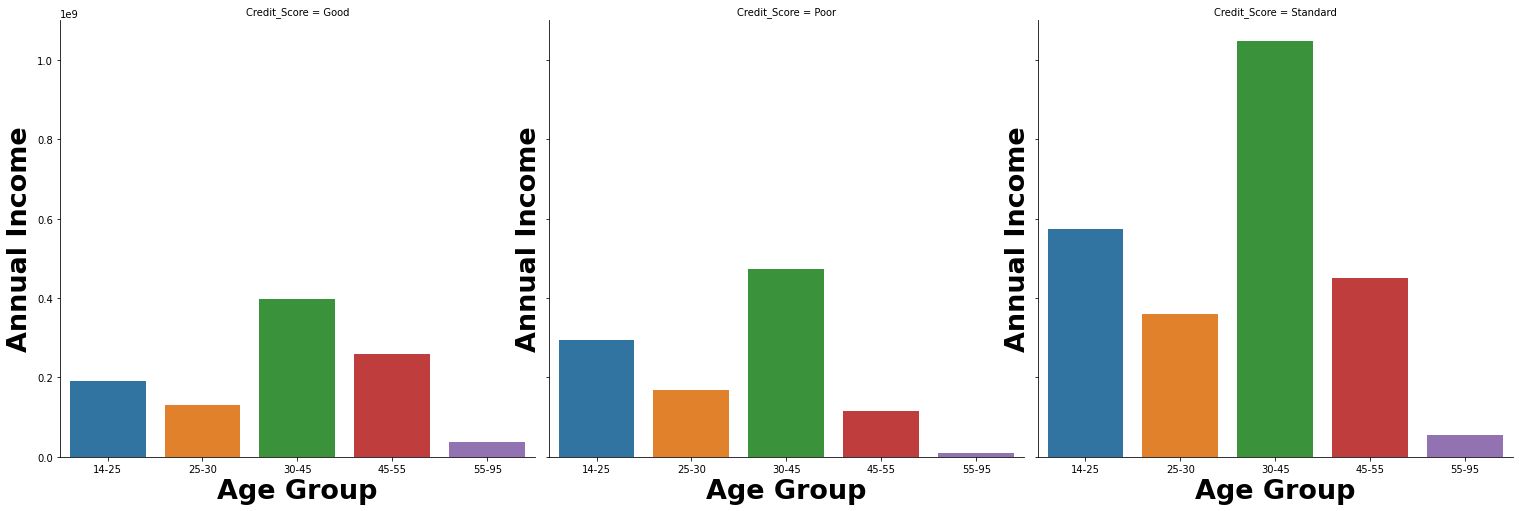

In [13]:
g = sns.catplot(
    data=age_groups,
    x="Age_Group",
    y="Annual_Income",
    height=7,
    aspect=1,
    col="Credit_Score",
    kind="bar",
    ci=None,
)
g.set_axis_labels("Age Group", "Annual Income")

# Adjust the font size and weight of the axis labels
for ax in g.axes.flat:
    
    ax.set_xlabel("Age Group", fontsize=27, fontweight="bold")
    
    ax.set_ylabel("Annual Income", fontsize=27, fontweight="bold")

plt.show()

Customers between the ages of 30 and 45 constitute the most significant category with substantial outstanding debts. This suggests that individuals in their prime working years tend to have higher purchasing power, leading to increased indebtedness. Conversely, customers aged between 45 and 55 exhibit lower outstanding debt, indicating a more conservative financial approach as they approach retirement.


Furthermore, customers aged between 30 and 45 also represent the highest category in terms of annual income. Interestingly, the second-largest age group falls between 14 and 25, indicating that individuals in this age range are capable of generating substantial income. However, it's noteworthy that the two largest age groups predominantly have standard or poor credit scores. In contrast, individuals aged 45 to 55 exhibit a higher proportion of good credit scores compared to the younger age group (14 to 25).

# Modeling

### Categorical Features

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94948 entries, 0 to 94947
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       94948 non-null  float64
 1   Occupation                94948 non-null  object 
 2   Annual_Income             94948 non-null  float64
 3   Monthly_Inhand_Salary     94948 non-null  float64
 4   Num_Bank_Accounts         94948 non-null  float64
 5   Num_Credit_Card           94948 non-null  float64
 6   Interest_Rate             94948 non-null  float64
 7   Num_of_Loan               94948 non-null  float64
 8   Type_of_Loan              94948 non-null  object 
 9   Delay_from_due_date       94948 non-null  float64
 10  Num_of_Delayed_Payment    94948 non-null  float64
 11  Changed_Credit_Limit      94948 non-null  float64
 12  Num_Credit_Inquiries      94948 non-null  float64
 13  Credit_Mix                94948 non-null  object 
 14  Outsta

In [15]:
df_category = df.select_dtypes(include=[object, 'category'])

df_category.drop(['Type_of_Loan', 'Credit_Score'], axis=1, inplace=True)

df_category.head(3)

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_History_labels,Age_Group
0,Scientist,Good,No,High_spent_Small_value_payments,Long,14-25
1,Scientist,Good,No,Low_spent_Large_value_payments,Long,14-25
2,Scientist,Good,No,Low_spent_Medium_value_payments,Long,14-25


In [16]:
# getting dummies for our categorical features

df_category = pd.get_dummies(df_category)

df_category.head()

,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,...,Credit_History_labels_Long,Credit_History_labels_Medium,Credit_History_labels_Short,Credit_History_labels_Very Long,Credit_History_labels_Very Short,Age_Group_14-25,Age_Group_25-30,Age_Group_30-45,Age_Group_45-55,Age_Group_55-95
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


### Numerical Features

In [17]:
df_numerical = df.select_dtypes(exclude=[object, 'category'])

df_numerical.drop(['Age', 'Credit_History_Age'], inplace=True, axis=1)

df_numerical.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Monthly_Balance,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,...,312.494089,1,1,0,1,0,0,0,1,0
1,19114.12,1824.843333,3.0,4.0,3.0,4.0,1.0,4.0,11.27,4.0,...,284.629162,1,1,0,1,0,0,0,1,0
2,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,...,331.209863,1,1,0,1,0,0,0,1,0
3,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,...,223.451310,1,1,0,1,0,0,0,1,0
4,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,...,341.489231,1,1,0,1,0,0,0,1,0


In [18]:
df_numerical.shape

(94948, 24)

Log transformation: a handy technique for adjusting data scales and distributions. By taking the logarithm of each data point, it helps normalize skewed data, stabilize variance, and linearize relationships between variables. Just apply selectively to variables with wide ranges or skewness, and handle zero and negative values with care. It's a must-have tool for preprocessing data, making analysis and interpretation a breeze!

In [19]:
for col in ['Monthly_Balance', 'Amount_invested_monthly', 'Outstanding_Debt', 'Annual_Income', 'Monthly_Inhand_Salary']:
    
    df_numerical[col] = np.log(df_numerical[col] + 1e-8)

In [20]:
# concatenating our numerical and categorical dataframes

df_final = pd.concat((df_numerical, df_category), axis=1)

df_final.head(3)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Credit_History_labels_Long,Credit_History_labels_Medium,Credit_History_labels_Short,Credit_History_labels_Very Long,Credit_History_labels_Very Short,Age_Group_14-25,Age_Group_25-30,Age_Group_30-45,Age_Group_45-55,Age_Group_55-95
0,9.858183,7.509249,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,...,1,0,0,0,0,1,0,0,0,0
1,9.858183,7.509249,3.0,4.0,3.0,4.0,1.0,4.0,11.27,4.0,...,1,0,0,0,0,1,0,0,0,0
2,9.858183,7.509249,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,...,1,0,0,0,0,1,0,0,0,0


In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94948 entries, 0 to 94947
Data columns (total 61 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Annual_Income                                       94948 non-null  float64
 1   Monthly_Inhand_Salary                               94948 non-null  float64
 2   Num_Bank_Accounts                                   94948 non-null  float64
 3   Num_Credit_Card                                     94948 non-null  float64
 4   Interest_Rate                                       94948 non-null  float64
 5   Num_of_Loan                                         94948 non-null  float64
 6   Delay_from_due_date                                 94948 non-null  float64
 7   Num_of_Delayed_Payment                              94948 non-null  float64
 8   Changed_Credit_Limit                                94948 non-null  float64


### Addressing Class Imbalance with SMOTE

Given our imbalanced dataset, we have two options for addressing this issue: utilizing class weights or employing SMOTE, an oversampling technique. In our case, we'll opt for SMOTE to balance out classes with fewer instances by upsampling them.

In [22]:
smote = SMOTE()

df_final, df_train = smote.fit_resample(df_final.to_numpy(), df['Credit_Score'])

### Splitting Our Dataset into Train and Test Sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_final, df_train, test_size=0.2, stratify=df_train)

In [24]:
X_train.shape

(121999, 61)

In [25]:
X_test.shape

(30500, 61)

In [26]:
y_train.head()

132667        Poor
127389        Good
88479     Standard
17484         Poor
113227        Good
Name: Credit_Score, dtype: object

In [27]:
credit_score_map = {"Poor": 0, "Standard": 1, "Good": 2}

y_train = y_train.replace(credit_score_map)

y_test = y_test.replace(credit_score_map)

### Scaling

In [28]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled.shape

(121999, 61)

### Modeling

We'll utilize the default parameter configurations for each model at this time.

In [30]:
rnd_clf = RandomForestClassifier(random_state=0, bootstrap=True, oob_score=True, n_estimators=500,
                                  n_jobs=2)

ext_clf = ExtraTreesClassifier(random_state=0, bootstrap=True, oob_score=True, n_estimators=500,
                                  n_jobs=2)
ada_clf = AdaBoostClassifier()

grd_clf = GradientBoostingClassifier(random_state=0)

svc_clf = SVC(max_iter=5_000)

knn_clf = KNeighborsClassifier()

In [31]:
def fit_models(models, X_train_scaled, y_train, X_test_scaled, y_test):
    
    for idx, model in enumerate(models):
        
        print(f"#{idx+1}. Training {model.__class__.__name__}\n")
        
        model.fit(X_train_scaled, y_train)
        
        # Cross-validation
        acc = cross_val_score(model, X_train_scaled, y_train, cv=3)
        
        print(f"\tModel cross-validation accuracy on train set: {np.mean(acc):.2%}\n")
        
        # Classification report on the test set
        print(f"\tTest set Classification Report - {model.__class__.__name__}\n")
        
        pred = model.predict(X_test_scaled)
        
        clf_report = classification_report(y_test, pred)
        
        print(clf_report)
        
        print("=======================================================")

In [32]:
models = [rnd_clf, ext_clf, ada_clf, grd_clf, svc_clf, knn_clf]

fit_models(models, X_train_scaled, y_train, X_test_scaled, y_test)

#1. Training RandomForestClassifier

	Model cross-validation accuracy on train set: 85.51%

	Test set Classification Report - RandomForestClassifier

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     10167
           1       0.86      0.78      0.82     10166
           2       0.87      0.94      0.90     10167

    accuracy                           0.87     30500
   macro avg       0.87      0.87      0.87     30500
weighted avg       0.87      0.87      0.87     30500

#2. Training ExtraTreesClassifier

	Model cross-validation accuracy on train set: 86.57%

	Test set Classification Report - ExtraTreesClassifier

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     10167
           1       0.88      0.79      0.83     10166
           2       0.89      0.95      0.92     10167

    accuracy                           0.88     30500
   macro avg       0.88      0.88      0.88     305

In conclusion, after exploring various advanced machine learning algorithms and evaluating them using key metrics like precision, recall, F1-score, and accuracy, we identified Random Forest, ExtraTrees, Gradient Boosting Classifier, and KNeighbours Classifier as the top performers with the highest test set accuracy. Our next step involves hyperparameter tuning for these models to potentially further increase accuracy. This iterative approach aims to refine our predictive model, ensuring its effectiveness in determining credit scores based on user-input financial parameters.